In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data

In [2]:
df = pd.read_excel('Canada.xlsx', sheet_name = 'Canada by Citizenship', skiprows = 20, skipfooter =2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


## Pre processing of data according to need

In [3]:
print(df.columns.tolist())

['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName', 'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


In [4]:
df.rename({
    'OdName':'country',
    'AreaName':'continent',
    'RegName': 'region',
    'DevName':'country_status'
}, axis = 1,inplace = True) 

In [5]:
df.head()

,Type,Coverage,country,AREA,continent,REG,region,DEV,country_status,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
cols_to_drop = ['Type','Coverage','AREA','REG','DEV']

### If any column has single value you can remove it **To see unique values** 👉🏻 (df.desc | df['Type'].value_counts())


In [7]:
df.describe(include='object') # It will show that Type will have only 1 unique value

,Type,Coverage,country,continent,region,country_status
count,195,195,195,195,195,195
unique,1,2,195,6,22,2
top,Immigrants,Foreigners,Afghanistan,Africa,Western Asia,Developing regions
freq,195,194,1,54,18,147


In [8]:
df['Type'].value_counts()

Immigrants    195
Name: Type, dtype: int64

In [9]:
df.drop(columns = cols_to_drop , inplace=True) # Columns with no useful data are dropped

In [10]:
df

,country,continent,region,country_status,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,124,161,140,122,133,128,211,160,174,217
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,56,91,77,71,64,60,102,69,46,59


## Making a column as index

In [11]:
df.set_index('country', inplace= True) # set column country as index

In [12]:
years = list(range(1980,2014))
df['total']=df[years].sum(axis=1)
df.head(3)

,continent,region,country_status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


# Making country status to binary

In [13]:
def binarize(val):
    if val == 'Devloping regions':
        return 0
    else:
        return 1
df['country_status']=df['country_status'].apply(binarize)

In [14]:
df.head()

,continent,region,country_status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,1,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,1,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,1,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [15]:
df.sort_values(by = 'total',ascending = False, inplace =True)
df.head()

,continent,region,country_status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,1,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,1,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,1,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,1,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,1,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


### Just for the situation , we have a 40 something columns and as we can see them, we will change pandas display options to show all columns

In [16]:
print(df.index.tolist())

['India', 'China', 'United Kingdom of Great Britain and Northern Ireland', 'Philippines', 'Pakistan', 'United States of America', 'Iran (Islamic Republic of)', 'Sri Lanka', 'Republic of Korea', 'Poland', 'Lebanon', 'France', 'Jamaica', 'Viet Nam', 'Romania', 'Haiti', 'Guyana', 'Portugal', 'Egypt', 'Morocco', 'Colombia', 'Iraq', 'Algeria', 'Israel', 'Bangladesh', 'Germany', 'Russian Federation', 'Mexico', 'Afghanistan', 'El Salvador', 'Ukraine', 'Trinidad and Tobago', 'Somalia', 'South Africa', 'Nigeria', 'Jordan', 'Ethiopia', 'Peru', 'Turkey', 'Syrian Arab Republic', 'Brazil', 'Japan', 'Netherlands', 'Ghana', 'Democratic Republic of the Congo', 'Malaysia', 'Australia', 'Bulgaria', 'Italy', 'Bosnia and Herzegovina', 'Chile', 'Venezuela (Bolivarian Republic of)', 'Fiji', 'Cuba', 'Argentina', 'Guatemala', 'Sudan', 'Tunisia', 'Kenya', 'Ireland', 'Hungary', 'Cameroon', 'Albania', 'Mauritius', 'Switzerland', 'Republic of Moldova', 'Singapore', 'Indonesia', 'United Republic of Tanzania', 'Gre

### Making lenthy names shorter

In [17]:
df.rename({
    'United Kingdom of Great Britain and Northern Ireland':'United Kingdom'
    
})

,continent,region,country_status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,1,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,1,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom,Europe,Northern Europe,1,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,1,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,1,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Europe,Southern Europe,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,1,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2


## Changing Plot Theme

In [18]:
print(plt.style.available)
plt.style.use('tableau-colorblind10')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<AxesSubplot: >

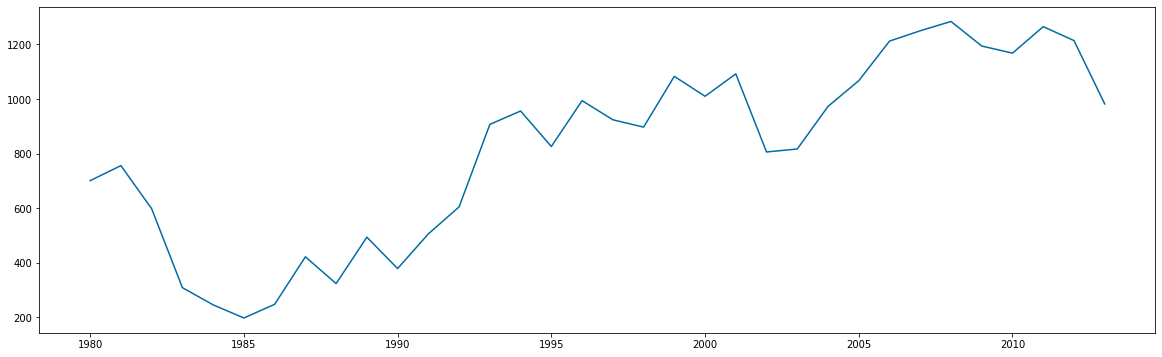

In [19]:
df.loc['Japan',years].plot(kind='line',figsize=(20,6))

# Add pandas styling
- recommended when data size is small

In [20]:
continent_df = df.groupby('continent')[years].sum()

In [21]:
continent_df.style.background_gradient(cmap='Pastel1')

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


In [22]:
continent_df.style.bar(color='hotpink')

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


In [23]:
continent_df.style.text_gradient(cmap='rainbow')

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


# Visualization on map
- matplotlib
- plotly

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Basic Graphs - Matplotlib
1. Line Plot
2. Bar Plot
3. Pie Chart
4. Box
5. Scatter
6. Histogram
7. Area
## Advanced Graphs - Seaborn
1. Cat Plot
2. Join Plot
3. Pair Chart
4. Heat Box
5. Voilin Plot
6. Coubt Plot
## Inteactive graphs - Plotly
1. graphs similar to matplotlib



In [25]:
df.loc['China',years].plot(kind='Line',figsize(20,6),linewidth = 5, linestyle =':'color = 'orange')

SyntaxError: positional argument follows keyword argument (2415901311.py, line 1)

<AxesSubplot: >

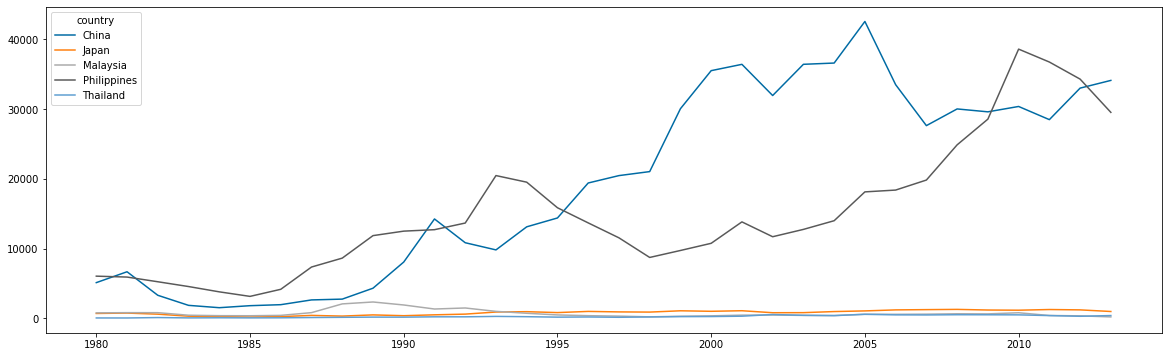

In [ ]:
country_list = ['China','Japan','Malaysia','Philippines','Thailand']
df.loc[country_list,years].T.plot(figsize=(20,6))

<AxesSubplot: >

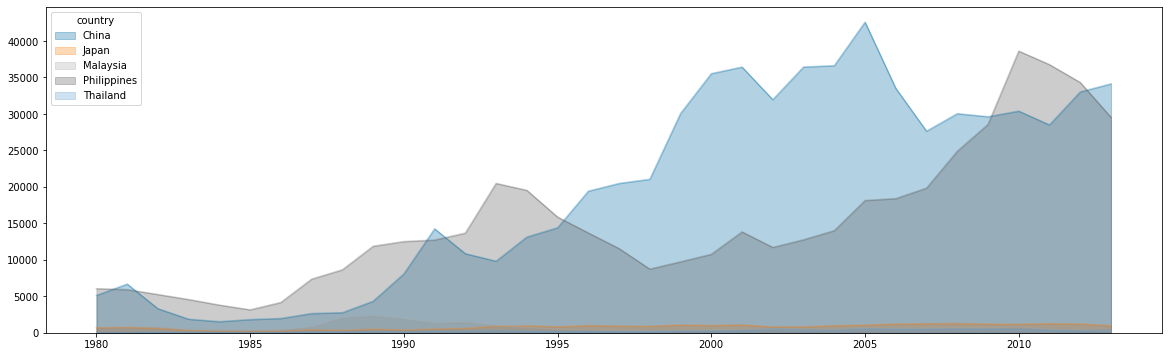

In [ ]:
df.loc[country_list,years].T.plot(kind='area',figsize=(20,6),stacked = False, alpha =0.3)

# If we plot 6 fields they will overlap
- using subplots & layout 

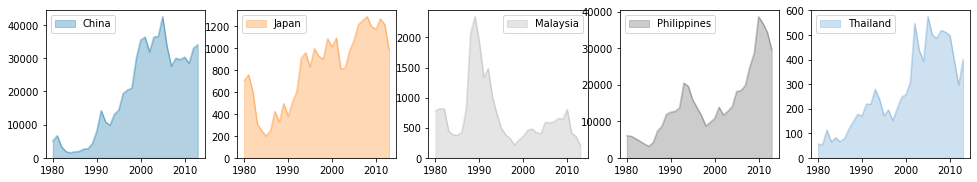

In [ ]:
from matplotlib.pyplot import subplot, subplots


_= df.loc[country_list,years].T.plot(kind='area',figsize=(20,6),stacked = False, alpha =0.3,subplots = True, layout=(2,6),sharex = False)

# _ is used for removing the <axis=><axis=> this statements that appear in output


<AxesSubplot: ylabel='Frequency'>

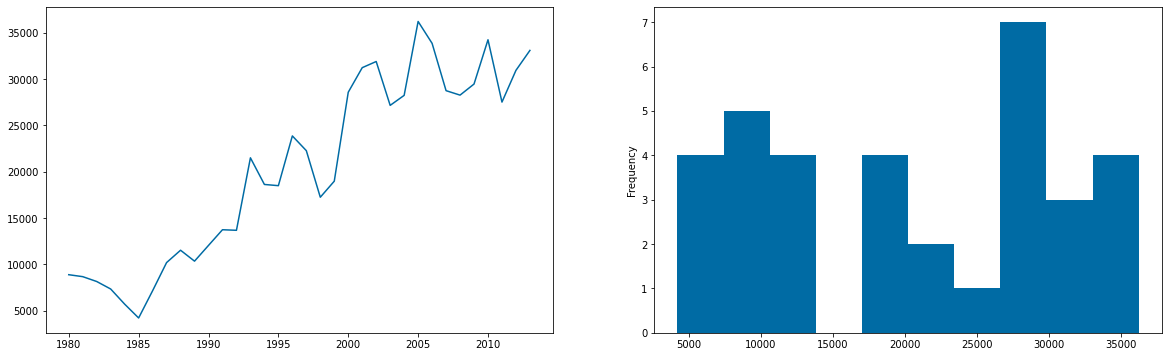

In [ ]:
fig, ax = plt.subplots(figsize = (20,6),nrows = 1,ncols = 2)
df.loc['India',years].plot(ax=ax[0])                # 1st graph 
df.loc['India',years].plot(ax=ax[1],kind='hist')    # 2nd Graph

## Set Title of grpahs

Text(0.5, 1.0, "Inida's frequency of to Canada")

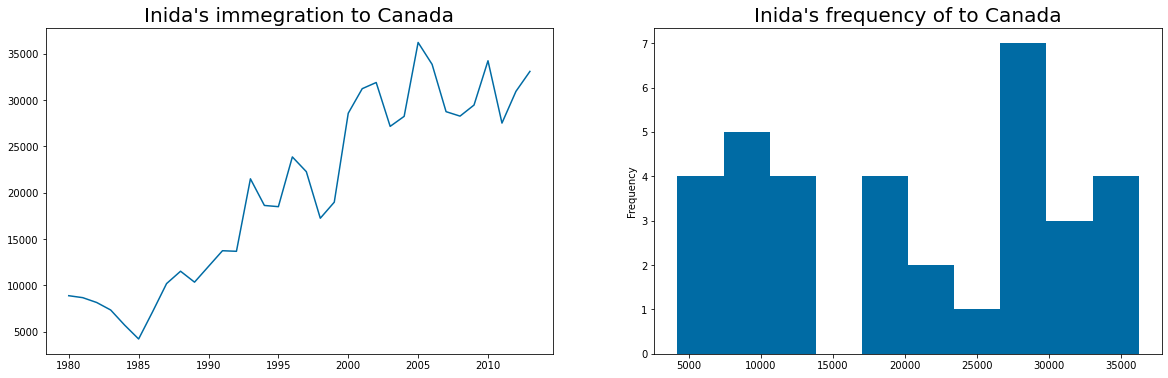

In [ ]:


fig, ax = plt.subplots(figsize = (20,6),nrows = 1,ncols = 2)
df.loc['India',years].plot(ax=ax[0])                # 1st graph 
df.loc['India',years].plot(ax=ax[1],kind='hist')    # 2nd Graph
ax[0].set_title("Inida's immegration to Canada",fontsize = 20)
ax[1].set_title("Inida's frequency of to Canada",fontsize = 20)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

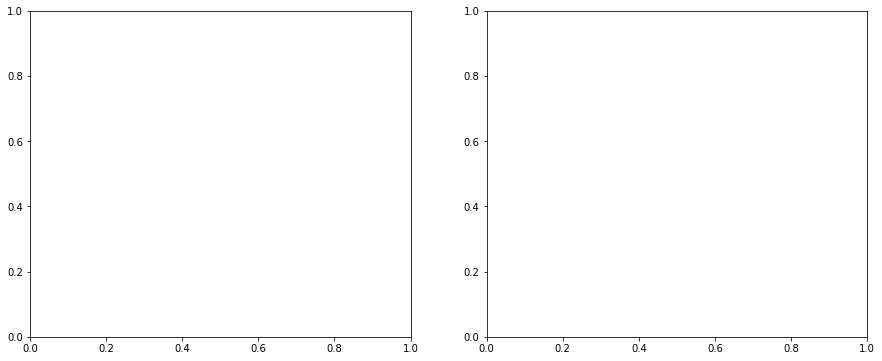

In [ ]:
fig, ax = plt.subplots(figsize = (15,6),nrows = 1,ncols = 2)
df.loc['India',years].plot(ax=ax[0,0])                # 1st graph 
df.loc['India',years].plot(ax=ax[0,1],kind='hist')    # 2nd Graph
df.loc['China',years].plot(ax=ax[1,0])                # 1st graph 
df.loc['China',years].plot(ax=ax[1,1],kind='hist')    # 2nd Graph

ax[0,0].set_title("Inida's immegration to Canada",fontsize = 20)
ax[0,1].set_title("Inida's frequency of to Canada",fontsize = 20)
ax[1,0].set_title("China's frequency of to Canada",fontsize = 20)
ax[1,1].set_title("China's frequency of to Canada",fontsize = 20)

plt.show()


<AxesSubplot: >

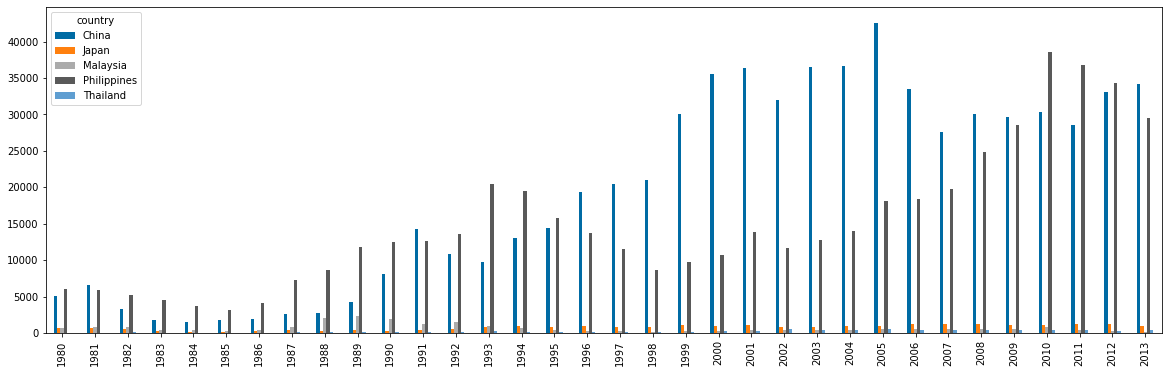

In [ ]:
df.loc[country_list,years].T.plot(kind='bar',figsize=(20,6),stacked= False)

In [ ]:
continent_df

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


<AxesSubplot: >

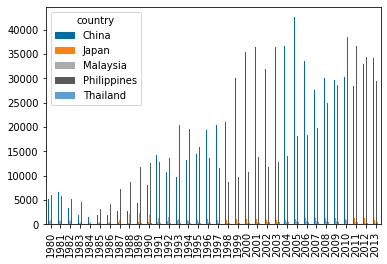

In [ ]:
df.loc[country_list,years].T.plot(kind = 'bar')

Text(0, 0.5, '')

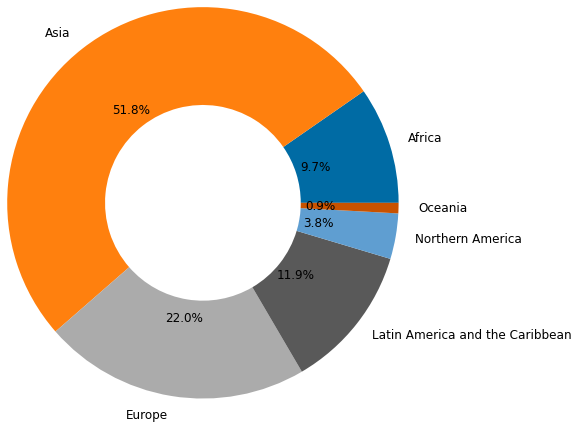

In [ ]:
plt.figure(facecolor ='white')
continent_df['total'] = continent_df.sum(axis=1)
continent_df['total'].plot(kind ='pie',figsize=(20,6),autopct='%1.1f%%',radius =1.5,fontsize=12,wedgeprops={'width':0.75})
plt.ylabel('')


## Save graph

In [ ]:
plt.savefig('continent_wise.png',dpi=300,bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.loc[country_list,years].T.plot(kind='box',figsize=(20,10))

AttributeError: module 'matplotlib.pyplot' has no attribute 'loc'

# PLotly
- if youre getting a graph and a long error then
- pip install nbformat
- then restart the notebook

In [27]:
years = list(range(1980,2014))
india_data=df.loc['India',years]
px.line(india_data,x=india_data.index,y=india_data.values,markers=True)

## Note 
- pichli library me df. karke use karte they
- is library me dataframe ko as an object pass karte hai


In [28]:
countrydf = df.loc[country_list,years]
px.bar(countrydf,x=country.index , y=countrydf.columns,barmode = 'group',log_y=True)

NameError: name 'country_list' is not defined

In [31]:
px.choropleth(df , locations=df.index,locationmode='country names', color = 1980)

# Folium

In [36]:
import folium

In [39]:
folium.Map(location=[26.8467,80.9462],zoom_start =14,height = 400)

In [40]:
folium.Map(location=[26.8467,80.9462],zoom_start =14,height = 400,tiles = 'Stamen Toner')

In [41]:
folium.Map(location=[26.8467,80.9462],zoom_start =14,height = 400, tiles = 'Stamen watercolor')

In [42]:
lko = folium.Map(location=[26.8467, 80.9462],zoom_start = 14 , height =400)
m1 = folium.Marker([26.8467, 80.9462],popup = 'Lucknow Center',tooltip = 'Click to see')
m1.add_to(lko)
lko

In [43]:
lko.add_child(folium.ClickForMarker)

TypeError: get_name() missing 1 required positional argument: 'self'